# Capstone project 1: House prices advanced regression

## Machine Learning - Xgboost Model

In [47]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
import pickle

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
# Load training and testing data
X_train = pd.read_csv('./data/X_train.csv',index_col=0)
X_test = pd.read_csv('./data/X_test.csv',index_col=0)
y_train = pd.read_csv('./data/y_train.csv',index_col=0)
y_test = pd.read_csv('./data/y_test.csv',index_col=0)

In [23]:
X_train.head()

,x0_0.0,x0_1.0,x0_2.0,x0_3.0,x0_4.0,x1_0.0,x1_1.0,x2_0.0,x2_1.0,x2_2.0,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.186178,0.093349,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,1.00
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.592384,0.000000,0.065814,0.000000,0.0,0.0,0.0,0.0,0.363636,0.75
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.465444,0.116686,0.031079,0.000000,0.0,0.0,0.0,0.0,0.909091,0.00
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.468970,0.000000,0.131627,0.315217,0.0,0.0,0.0,0.0,0.363636,0.50
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.479549,0.000000,0.137112,0.000000,0.0,0.0,0.0,0.0,0.363636,1.00


### First Model

In [24]:
# First model, using grid search with xgboost-regressor

search_grid1 = {
    'learning_rate':np.arange(0.05,1,0.05),
    'subsample':np.arange(0.05,1,0.05),
    'max_depth':np.arange(3,10,1)
}
model1 = xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror')

random_search_r2 = RandomizedSearchCV(estimator=model1,
                                      param_distributions=search_grid1,
                                      scoring= 'r2',
                                      cv=4,
                                      n_iter=10,
                                      verbose=1)
random_search_r2.fit(X_train,y_train)
print('Best score: ', random_search_r2.best_score_)
print('Bset model: ', random_search_r2.best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   58.4s finished


Best score:  0.7891578735200098
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)


In [27]:
#Verify modeling fitting using test data

y_test_predict1 = random_search_r2.best_estimator_.predict(X_test)
r2 = r2_score(y_test,y_test_predict1)

print('r2:{}'.format(r2))


r2:0.8170618282526447


In [32]:
# save model
pickle.dump(random_search_r2.best_estimator_, open("xgb_model_r2.dat", "wb"))

### Second Model

In [33]:
search_grid2 = {
    'learning_rate':np.arange(0.05,1,0.05),
    'n_estimators':np.arange(50,300,50),
    'subsample':np.arange(0.05,1,0.05)
}
model2 = xgb.XGBRegressor(max_depth=8,objective='reg:squarederror')
random_search_mse = RandomizedSearchCV(estimator=model2,
                                       param_distributions=search_grid2,
                                       scoring='neg_mean_squared_error',
                                       cv=5,
                                       n_iter=10,
                                       verbose=1)
random_search_mse.fit(X_train,y_train)
print('Best score: ', random_search_mse.best_score_)
print('Bset model: ', random_search_mse.best_estimator_)
print('Best_RMSE: ',np.sqrt(np.abs(random_search_mse.best_score_)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


Best score:  -0.0024141719787529035
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8, verbosity=1)
Best_RMSE:  0.049134224108587525


In [34]:
#Verify modeling fitting using test data

y_test_predict2 = random_search_mse.best_estimator_.predict(X_test)
mse_r2 = r2_score(y_test,y_test_predict2)

print('r2:{}'.format(mse_r2))

r2:0.8685148253706018


In [35]:
# save model
pickle.dump(random_search_mse.best_estimator_, open("xgb_model_mse.dat", "wb"))

### Third Model

In [40]:
random_search3 = RandomizedSearchCV(estimator=model2,
                                      param_distributions=search_grid2,
                                      scoring= 'r2',
                                      cv=5,
                                      n_iter=10,
                                      verbose=1)
random_search3.fit(X_train,y_train)
print('Best score: ', random_search3.best_score_)
print('Bset model: ', random_search3.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


Best score:  0.8473978722167116
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.35000000000000003,
             verbosity=1)


In [41]:
#Verify modeling fitting using test data

y_test_predict3 = random_search3.best_estimator_.predict(X_test)
r2_3 = r2_score(y_test,y_test_predict3)

print('r2:{}'.format(r2_3))

r2:0.8971400301127349


In [43]:
# save model
pickle.dump(random_search3.best_estimator_, open("xgb_model_r2.dat", "wb"))

### Fourth Model

In [44]:
random_search_mse = RandomizedSearchCV(estimator=model2,
                                       param_distributions=search_grid2,
                                       scoring='neg_mean_squared_error',
                                       cv=10,
                                       n_iter=10,
                                       verbose=1)
random_search_mse.fit(X_train,y_train)
print('Best score: ', random_search_mse.best_score_)
print('Bset model: ', random_search_mse.best_estimator_)
print('Best_RMSE: ',np.sqrt(np.abs(random_search_mse.best_score_)))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


Best score:  -0.0016746565500231779
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15000000000000002,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
             n_estimators=250, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7500000000000001, verbosity=1)
Best_RMSE:  0.040922567734969634


In [45]:
#Verify modeling fitting using test data

y_test_predict4 = random_search_mse.best_estimator_.predict(X_test)
mse2_r2 = r2_score(y_test,y_test_predict4)

print('r2:{}'.format(mse2_r2))

r2:0.8840670756806317


# testing accuracy is not better than model3, no need to save
# Best model so far is model3:"xgb_model_r2.dat"

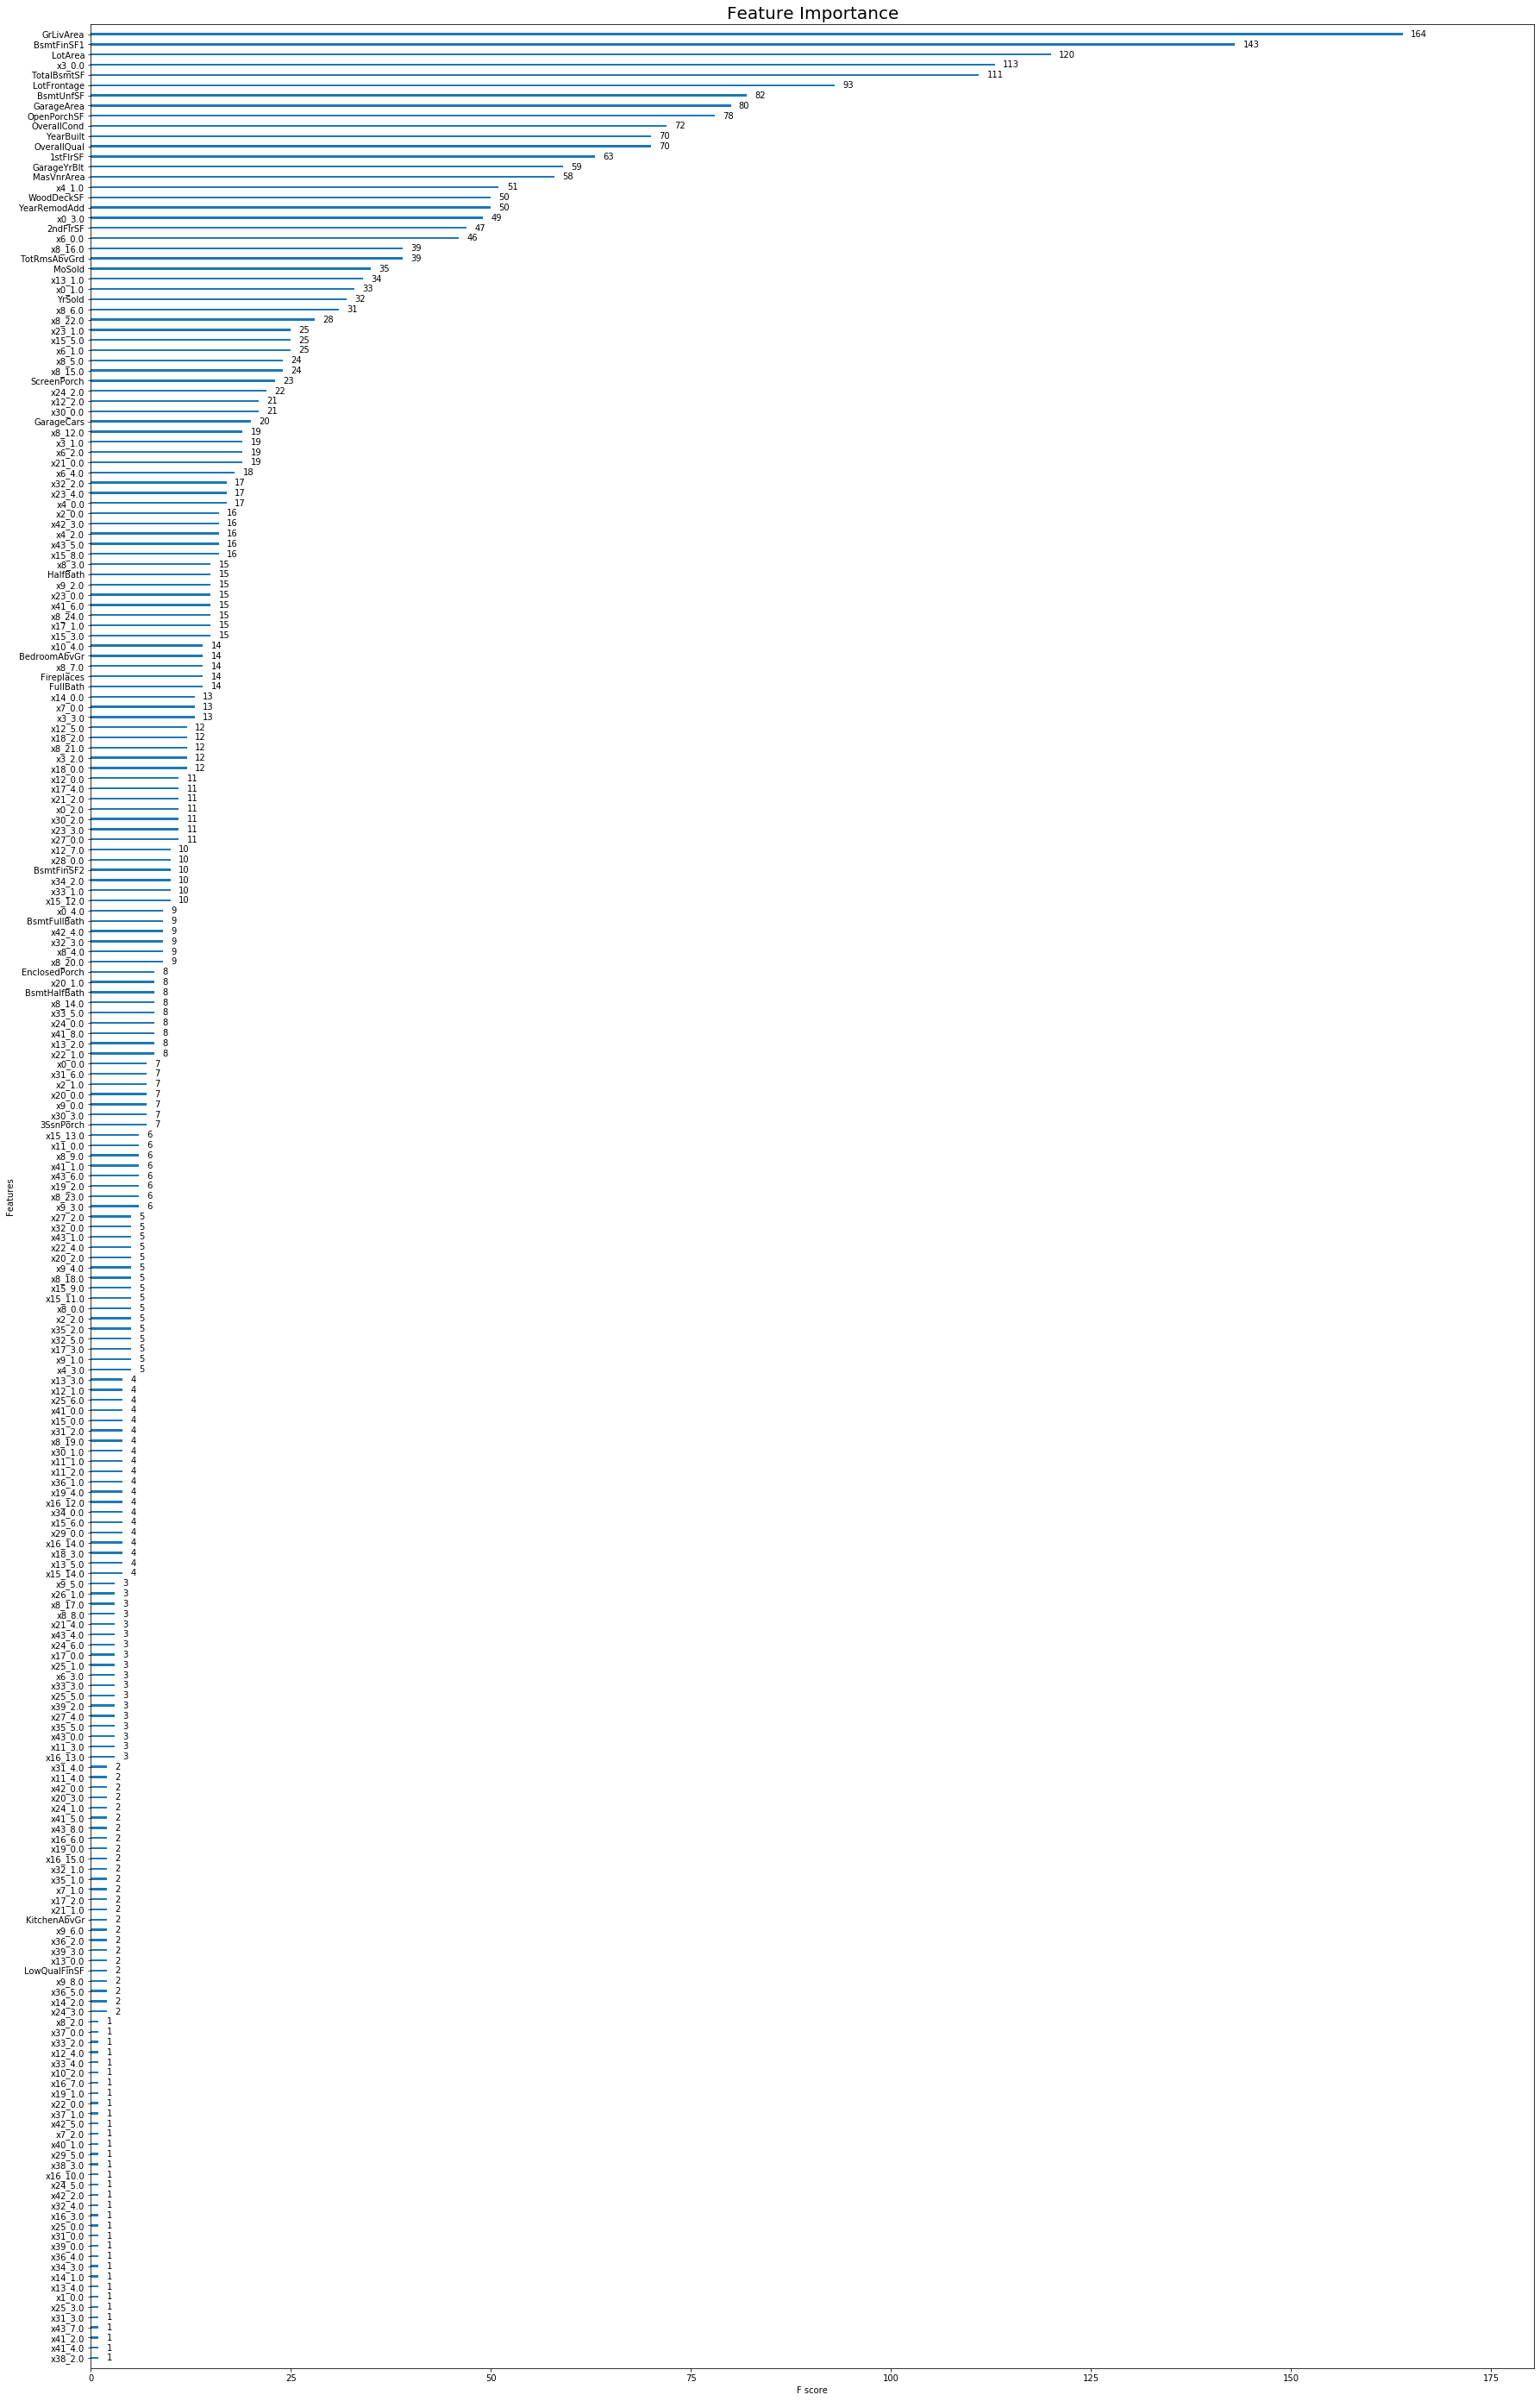

In [51]:
# Plot importance for model3:random_search3
fig1, ax1 = plt.subplots(1,1,figsize=(30,50))

g1 = plot_importance(random_search3.best_estimator_,ax=ax1,grid=False)
"""oldy = g1.yaxis.get_majorticklabels()

features = ['f'+str(x) for x in range(len(df1.columns))]
feature_dict = dict(zip(features,df1.columns))

newy = [str(feature_dict[y._text]) for y in oldy]
g1.set_yticklabels(newy, rotation=0, fontsize = 14)
"""
fig1.savefig('feature_importance')
plt.title('Feature Importance',fontsize=20)

plt.show()